

1.Data Loading



In [ ]:


# استيراد المكتبات الأساسية
import pandas as pd  # مكتبة التعامل مع البيانات
from mlxtend.frequent_patterns import apriori, association_rules  # مكتبة تحليل القواعد الارتباطية
from google.colab import files
import pandas as pd

# قراءة ملف CSV المحمل
df = pd.read_csv("Groceries_dataset.csv")

# عرض أول 5 صفوف من البيانات للتأكد من تحميلها بشكل صحيح
print(df.head())
print(df.columns)



   Member_number        Date   itemDescription
0           1808  21-07-2015    tropical fruit
1           2552  05-01-2015        whole milk
2           2300  19-09-2015         pip fruit
3           1187  12-12-2015  other vegetables
4           3037  01-02-2015        whole milk
Index(['Member_number', 'Date', 'itemDescription'], dtype='object')


2.Transforming Data into Transaction Format








In [ ]:
# التأكد من وجود الأعمدة المناسبة
print(df.columns)

# تحويل البيانات إلى صيغة معاملات (Transaction Format)
df_basket = df.groupby(['Member_number', 'Date'])['itemDescription'].apply(list).reset_index()
df_basket.columns = ['Member_number', 'Date', 'Items']

# عرض بعض البيانات
print(df_basket.head())


Index(['Member_number', 'Date', 'itemDescription'], dtype='object')
   Member_number        Date  \
0           1000  15-03-2015   
1           1000  24-06-2014   
2           1000  24-07-2015   
3           1000  25-11-2015   
4           1000  27-05-2015   

                                               Items  
0  [sausage, whole milk, semi-finished bread, yog...  
1                  [whole milk, pastry, salty snack]  
2                     [canned beer, misc. beverages]  
3                        [sausage, hygiene articles]  
4                         [soda, pickled vegetables]  


3.Converting Data to One-Hot Encoded Format








In [ ]:
from mlxtend.preprocessing import TransactionEncoder

# تحويل البيانات إلى صيغة معاملات ثنائية
te = TransactionEncoder()
te_ary = te.fit(df_basket['Items']).transform(df_basket['Items'])
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

# عرض البيانات المحولة
print(df_encoded.head())


   Instant food products  UHT-milk  abrasive cleaner  artif. sweetener  \
0                  False     False             False             False   
1                  False     False             False             False   
2                  False     False             False             False   
3                  False     False             False             False   
4                  False     False             False             False   

   baby cosmetics   bags  baking powder  bathroom cleaner   beef  berries  \
0           False  False          False             False  False    False   
1           False  False          False             False  False    False   
2           False  False          False             False  False    False   
3           False  False          False             False  False    False   
4           False  False          False             False  False    False   

   ...  turkey  vinegar  waffles  whipped/sour cream  whisky  white bread  \
0  ...   False 

4.Extracting Frequent Itemsets using Apriori








In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules

# تطبيق Apriori مع min_support أقل للحصول على المزيد من القواعد
frequent_itemsets = apriori(df_encoded, min_support=0.01, use_colnames=True)

# عرض أكثر المنتجات المشتركة شيوعًا
print(frequent_itemsets.head(10))

# استخراج القواعد الارتباطية باستخدام lift مع قيمة أقل لـ min_threshold
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.3)

# التحقق مما إذا كانت هناك قواعد
if rules.empty:
    print(" لم يتم العثور على أي قواعد ارتباطية، جرّب تقليل min_support أو min_threshold.")
else:
    # حساب متوسط الثقة والرفع فقط إذا كانت هناك قواعد
    confidence_mean = rules["confidence"].mean()
    lift_mean = rules["lift"].mean()

    print(f"متوسط الثقة (Confidence Mean): {confidence_mean:.4f}")
    print(f"متوسط الرفع (Lift Mean): {lift_mean:.4f}")

    # عرض أهم القواعد
    print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10))
    # إذا كان متوسط الثقة < 0.3 ➝ min_support منخفض جدًا ويؤدي إلى قواعد ضعيفة.
# إذا كان متوسط الرفع < 1.2 ➝ القواعد المستخرجة ليست قوية بما يكفي، حاول رفع min_support.
# إذا كان متوسط الرفع > 2 والثقة > 0.7 ولكن عدد القواعد قليل جدًا ➝ min_support كبير جدًا، حاول تقليله.



    support         itemsets
0  0.021386       (UHT-milk)
1  0.033950           (beef)
2  0.021787        (berries)
3  0.016574      (beverages)
4  0.045312   (bottled beer)
5  0.060683  (bottled water)
6  0.037626    (brown bread)
7  0.035220         (butter)
8  0.017577    (butter milk)
9  0.014369          (candy)
متوسط الثقة (Confidence Mean): 0.1007
متوسط الرفع (Lift Mean): 0.7882
          antecedents         consequents   support  confidence      lift
0  (other vegetables)        (rolls/buns)  0.010559    0.086481  0.786154
1        (rolls/buns)  (other vegetables)  0.010559    0.095990  0.786154
2  (other vegetables)        (whole milk)  0.014837    0.121511  0.769430
3        (whole milk)  (other vegetables)  0.014837    0.093948  0.769430
4        (whole milk)        (rolls/buns)  0.013968    0.088447  0.804028
5        (rolls/buns)        (whole milk)  0.013968    0.126974  0.804028
6              (soda)        (whole milk)  0.011629    0.119752  0.758296
7        (whole mil

5.Extracting Association Rules using Apriori








In [ ]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.5)

# عرض أهم القواعد الارتباطية
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head())


          antecedents         consequents   support  confidence      lift
0  (other vegetables)        (rolls/buns)  0.010559    0.086481  0.786154
1        (rolls/buns)  (other vegetables)  0.010559    0.095990  0.786154
2  (other vegetables)        (whole milk)  0.014837    0.121511  0.769430
3        (whole milk)  (other vegetables)  0.014837    0.093948  0.769430
4        (whole milk)        (rolls/buns)  0.013968    0.088447  0.804028


6.Extracting and Sorting Association Rules Based on Lift








In [ ]:
# استخراج القواعد الارتباطية باستخدام Apriori
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.3)

# التحقق من عدد القواعد المستخرجة
print(f"Total rules found: {len(rules)}")

# إذا كانت القواعد قليلة، تقليل min_threshold للحصول على المزيد
if len(rules) < 10:
    rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.2)

# ترتيب القواعد حسب أعلى قيمة للـ Lift
rules_sorted = rules.sort_values(by='lift', ascending=False)

# عرض أهم 10 قواعد
print(rules_sorted[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10))


Total rules found: 10
          antecedents         consequents   support  confidence      lift
8        (whole milk)            (yogurt)  0.011161    0.070673  0.822940
9            (yogurt)        (whole milk)  0.011161    0.129961  0.822940
4        (whole milk)        (rolls/buns)  0.013968    0.088447  0.804028
5        (rolls/buns)        (whole milk)  0.013968    0.126974  0.804028
0  (other vegetables)        (rolls/buns)  0.010559    0.086481  0.786154
1        (rolls/buns)  (other vegetables)  0.010559    0.095990  0.786154
2  (other vegetables)        (whole milk)  0.014837    0.121511  0.769430
3        (whole milk)  (other vegetables)  0.014837    0.093948  0.769430
6              (soda)        (whole milk)  0.011629    0.119752  0.758296
7        (whole milk)              (soda)  0.011629    0.073635  0.758296


7.Visualize results using network graphs.

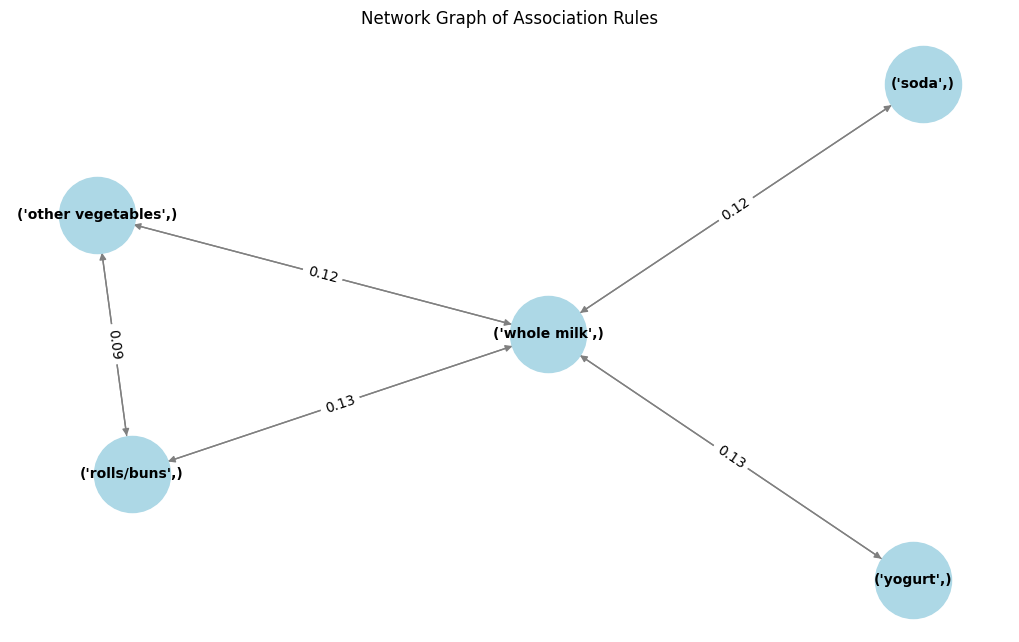

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# إنشاء الرسم البياني
G = nx.DiGraph()

# إضافة العلاقات إلى الرسم البياني
for _, row in rules_sorted.head(10).iterrows():  # عرض أول 10 قواعد فقط لتسهيل الفهم
    antecedent = tuple(row['antecedents'])  # المنتج الأول
    consequent = tuple(row['consequents'])  # المنتج الناتج
    confidence = round(row['confidence'], 2)  # الثقة في القاعدة

    G.add_edge(antecedent, consequent, weight=confidence)

# رسم المخطط
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G, seed=42)  # تحديد تخطيط الشبكة
edges = G.edges(data=True)

# رسم العقد (العناصر)
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="lightblue", edge_color="gray", font_size=10, font_weight="bold")

# إضافة أوزان الحواف (الثقة)
edge_labels = {(edge[0], edge[1]): edge[2]['weight'] for edge in edges}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)

plt.title("Network Graph of Association Rules")
plt.show()


# خطوات تحليل بيانات مشتريات العملاء باستخدام قواعد الارتباط

---

## الخطوة الأولى: تحميل ومعاينة البيانات

- **تحميل البيانات:**
  - تحميل ملف `Groceries_dataset.csv` الذي يحتوي على معلومات عن مشتريات العملاء.
  
- **معاينة البيانات:**
  - التحقق من الأعمدة الأساسية مثل:
    - رقم العميل (Member_number)
    - تاريخ الشراء (Date)
    - قائمة المنتجات (itemDescription)
  - التأكد من تنسيق البيانات وجودتها قبل بدء المعالجة.

- **النتائج المتوقعة:**
  - ظهور الأعمدة المذكورة مع بيانات أولية صحيحة.
  - التأكيد على صحة تنسيق البيانات لمزيد من المعالجة.

---

## الخطوة الثانية: تحويل البيانات إلى شكل معاملات

- **تجميع المعاملات:**
  - تحويل البيانات بحيث يحتوي كل صف على قائمة المنتجات التي اشتراها العميل في نفس اليوم.
  - كل معاملة تصبح عبارة عن "سلة" من المنتجات.

- **النتائج المتوقعة:**
  - الحصول على مجموعة بيانات حيث يمثل كل صف معاملة تحتوي على مجموعة المنتجات المشتراة.

---

## الخطوة الثالثة: تحويل البيانات إلى مصفوفة معاملات ثنائية

- **تنسيق البيانات لخوارزمية Apriori:**
  - تحويل كل منتج إلى عمود بحيث يمثل قيمة 1 إذا تم شراؤه في المعاملة و0 إذا لم يتم شراؤه.
  
- **النتائج المتوقعة:**
  - الحصول على مصفوفة معاملات ثنائية (binary matrix) جاهزة لتطبيق خوارزمية Apriori.

---

## الخطوة الرابعة: استخراج وتصفية القواعد باستخدام Apriori

- **استخراج المجموعات الشائعة (Frequent Itemsets):**
  - استخدام `min_support=0.01` لتحديد العناصر المتكررة ضمن المعاملات.

- **تصفية القواعد:**
  - تصفية القواعد باستخدام `min_threshold=0.3` بناءً على قيمة Lift.
  - حساب متوسط الثقة (Confidence Mean) ومتوسط الرفع (Lift Mean).
  - استخراج أهم 10 قواعد لتحليلها.

- **النتائج المتوقعة:**
  - إذا لم يتم العثور على قواعد، ينصح بتقليل `min_support` أو `min_threshold`.
  - إذا كان متوسط الثقة أقل من 0.3، تُعتبر القواعد ضعيفة وقد يستدعي ذلك رفع قيمة `min_support`.
  - إذا كان متوسط Lift أقل من 1.2، فإن القواعد ليست قوية بما فيه الكفاية ويتطلب الأمر تحسين التصفية.
  - إذا كان Lift > 2 مع ثقة مرتفعة ولكن عدد القواعد قليل، يمكن تقليل `min_support` قليلاً للحصول على نتائج أفضل.

---

## الخطوة الخامسة: استخراج قواعد الارتباط القوية

- **استخدام association_rules():**
  - استخراج القواعد التي تربط بين المنتجات.
  - تصفية القواعد بناءً على قيم Lift لضمان أن القواعد المستخرجة قوية ومفيدة.

- **النتائج المتوقعة:**
  - استخراج العلاقات القوية بين المنتجات بناءً على قيم Lift و Confidence.
  - الاحتفاظ فقط بالقواعد الأكثر فائدة للتسويق والتوصيات.

---

## الخطوة السادسة: تحليل القواعد بصريًا

- **إنشاء مخطط شبكي (Network Graph):**
  - رسم شبكة تربط المنتجات التي يتم شراؤها معًا.
  - تمثيل كل منتج بعقدة (Node) وكل وصلة (Edge) بين المنتجات تمثل علاقة ارتباط قوية.

- **النتائج المتوقعة:**
  - الحصول على مخطط شبكي يوضح العلاقات بين المنتجات.
  - تسهيل تحديد المنتجات الرئيسية والعلاقات القوية بينها، مما يساعد في استراتيجيات التسويق والتوصيات.
